# Position Size Optimizer

![financial](fm.jpg)

## Financial Markets
A [financial market](https://en.wikipedia.org/wiki/Financial_market) is a market in which people trade financial securities and derivatives at low transaction costs. Some of the securities include stocks and bonds, raw materials, and precious metals, which are known in the financial markets as commodities.

## Market Sentiment
![fed](fed.png)

As the time I started to write this article, Federal Reserve's tightening is going to change in a near future since its effects on the United States economy and we would see a huge rise in financial markets, but before that, as they haven't decided about the final interest rate, we have stuck in a range market, therefore, the best strategy you might choose for capital increasing is buy-in **Demand** zones and sell in **Supply** zones.

"The expected path of the federal funds rate implied by a straight read of financial market quotes rose notably over the intermeeting period, largely reflecting more-restrictive-than-expected monetary policy communications and data releases that pointed to inflation moving down more slowly than previously expected. On net, nominal Treasury yields increased across the maturity spectrum. The increases in nominal yields at medium and longer-term horizons were primarily accounted for by higher real yields, though inflation compensation measures rose as well." [November 2022 FOMC Minutes](https://www.federalreserve.gov/monetarypolicy/files/fomcminutes20221102.pdf)

## Risk Management
Suppose you're a beginner trader in financial markets such as [NASDAQ](https://www.nasdaq.com/) or [Cryptocurrencies](https://coinmarketcap.com/). As you know one of the most important factors in trading is risk/emotion management.

## I'm not a robot
As **[Prospect Theory](https://en.wikipedia.org/wiki/Prospect_theory)** which was developed by [Daniel Kahneman](https://en.wikipedia.org/wiki/Daniel_Kahneman) tells us, you are affected by your losses more than your gains Hence you've to go through financial markets by your logic.

## Prospect Theory

![prospect theory](ProspectTheory.jpg)

## The Problem
As you're a beginner trader, let me assume your **win-rate** to **50%** and your **risk/reward** to **1:2** which I point it R&R from now.

_Win-rate definition_: Your win rate shows how many trades you win out of all your trades. For example, if you make five trades a day and win three, your daily win rate is three out of five, or 60%. If there are 20 trading days in the month, and you win 60 out of 100 trades, your monthly win rate is 60%.

![win rate](win-rate.png)


_R&R definition_: The risk/reward ratio marks the prospective reward an investor can earn for every dollar they risk on an investment. Many investors use risk/reward ratios to compare the expected returns of an investment with the amount of risk they must undertake to earn these returns.

![risk reward](Risk-Reward-Ratio.png)

Back to the main problem. So you have had **1000$** as your **initial investment**.

### Example
Frankly speaking, since your win rate equals 50%, So your trades are supposed to be win-loss-win-loss-win-loss..., However, your R&R is 2, so in each step, you win, your capital is raised two times then lost. Thus

### $$ Position Sizing = 70\% $$
1. __WIN__: $$ 1000\$ * 70\% = 700\$ \xrightarrow{+1400\$} Cap = 1000\$ + 1400\$ = 2400\$ $$
2. __LOSS__: $$ 2400\$ * 70\% = 1680\$ \xrightarrow{-1680\$} Cap = 2400\$ - 1680\$ = 720\$ $$
3. __WIN__: $$ 720\$ * 70\% = 504\$ \xrightarrow{+1008\$} Cap = 720\$ + 1008\$ = 1728\$ $$
4. __LOSS__: $$ 1728\$ * 70\% = 1209.6\$ \xrightarrow{-1209.6\$} Cap = 1728\$ - 1209.6\$ = 518.4\$ $$
5. __WIN__: $$ 518.4\$ * 70\% = 362.88\$ \xrightarrow{+725.76\$} Cap = 518.4\$ + 725.76\$ = 1244.16\$ $$
6. __LOSS__: $$ 1244.16\$ * 70\% = 870.912\$ \xrightarrow{-870.912\$} Cap = 1244.16\$ - 870.912\$ = 373.248\$ $$

### $$ Position Sizing = 10\% $$
1. __WIN__: $$ 1000\$ * 10\% = 100\$ \xrightarrow{+200\$} Cap = 1000\$ + 200\$ = 1200\$ $$
2. __LOSS__: $$ 1200\$ * 10\% = 120\$ \xrightarrow{-120\$} Cap = 1200\$ - 120\$ = 1080\$ $$
3. __WIN__: $$ 1080\$ * 10\% = 108\$ \xrightarrow{+216\$} Cap = 1080\$ + 216\$ = 1296\$ $$
4. __LOSS__: $$ 1296\$ * 10\% = 129.6\$ \xrightarrow{-129.6\$} Cap = 1296\$ - 129.6\$ = 1166.4\$ $$
5. __WIN__: $$ 1166.4\$ * 10\% = 116.64\$ \xrightarrow{+233.28\$} Cap = 1166.4\$ + 233.28\$ = 1399.68\$ $$
6. __LOSS__: $$ 1399.68\$ * 10\% = 139.968\$ \xrightarrow{-139.968\$} Cap = 1399.68\$ - 139.968\$ = 1259.712\$ $$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

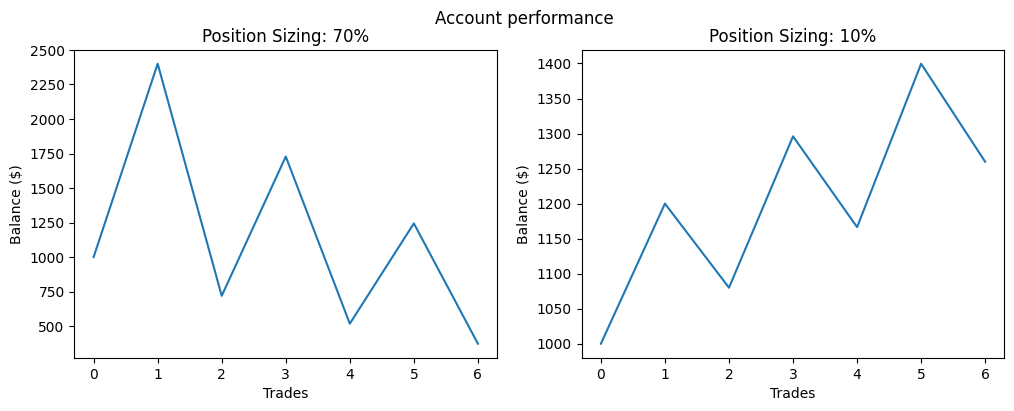

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Account performance')

account_performance = pd.Series([1000, 2400, 720, 1728, 518.4, 1244.16, 373.248])
account_performance_2 = pd.Series([1000, 1200, 1080, 1296, 1166.4, 1399.68, 1259.712])

ax[0].plot(account_performance)
ax[0].set_title('Position Sizing: 70%')
ax[0].set_xlabel('Trades')
ax[0].set_ylabel('Balance ($)')

ax[1].plot(account_performance_2)
ax[1].set_title('Position Sizing: 10%')
ax[1].set_xlabel('Trades')
ax[1].set_ylabel('Balance ($)');

It's clear that in `PS=70%` account balance was in a downtrend, on the other hand in the second picture our account balance was in an uptrend.

## What is the most efficient position sizing?
Let's make our capital formula after each trade

$$ \lambda = position_{size} $$
$$ f(\lambda) = 1000 * (1 + 2\lambda)^{3} * (1 - \lambda)^{3} $$

In the way to reach a more abstract formula, let's assume $ i $ as initial capital, $ x $ as the number of trades, $ R $ as R&R and $ \omega $ as win-rate. So the formula is turned to

$$ f(i, \lambda, x, R, \omega) = i * (1 + R\lambda)^{\omega x} * (1 - \lambda)^{(1-\omega)x} $$

After removing constants from the formula

$$ f(\lambda) = i * (1 + R\lambda)^{\omega x} * (1 - \lambda)^{(1-\omega)x} $$

_Hint: most parameters were removed from the formula because we can't have a decision on them, such that, win-rate. your real win rate is calculated after hundreds of trades_

In [3]:
from gekko import GEKKO

## Decision Variables 

The most important factor in solving optimization problems are choosing decision variables. There is only one decision variable in this problem which is $ \lambda $

## Objective Function

I've supposed these constants after 50 days of trade

$$ i = 1000\$, R = 2, \omega = 0.5, x = 50 $$

$$ Max f = 1000 * (1 + 2\lambda) ^ {25} * (1 - \lambda) ^ {25} $$

In [4]:
model = GEKKO()

i, R, W, x = 1000, 2, 0.5, 50
_lambda = model.Var(lb=0, ub=i)

model.Obj(-i * ((1 + R * _lambda) ** (W * x)) * ((1 - _lambda) ** ((1 - W) * x)))

In [5]:
t = np.linspace(0, 1, 100)
return_func = lambda t: ((1 + R * t) ** (W * x)) * ((1 - t) ** ((1 - W) * x))

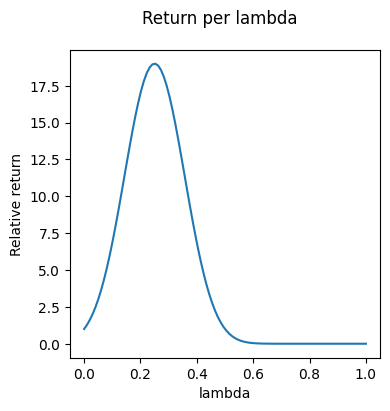

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
fig.suptitle('Return per lambda')

ax.plot(t, return_func(t))
ax.set_xlabel('lambda')
ax.set_ylabel('Relative return');

In the end, there is no constraint since I've set the upper-bound and lower-bound for `_lambda` parameter. 

Let's solve the problem.

In [7]:
model.solve()

apm 2.191.238.152_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            1
   Intermediates:            0
   Connections  :            0
   Equations    :            1
   Residuals    :            1
 
 Number of state variables:              1
 Number of total equations: -            0
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              1
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program c

In [8]:
print(f'Your optimized position size: {_lambda.value[0]}% of your account --> {i * _lambda.value[0]}$\nYour optimized return after {x} day trading: {-model.options.objfcnval}')

Your optimized position size: 0.25% of your account --> 250.0$
Your optimized return after 50 day trading: 19002.601511


In [9]:
t = np.linspace(0, x, x)
return_function = lambda t, u: ((1 + R * t) ** (W * u)) * ((1 - t) ** ((1 - W) * u))

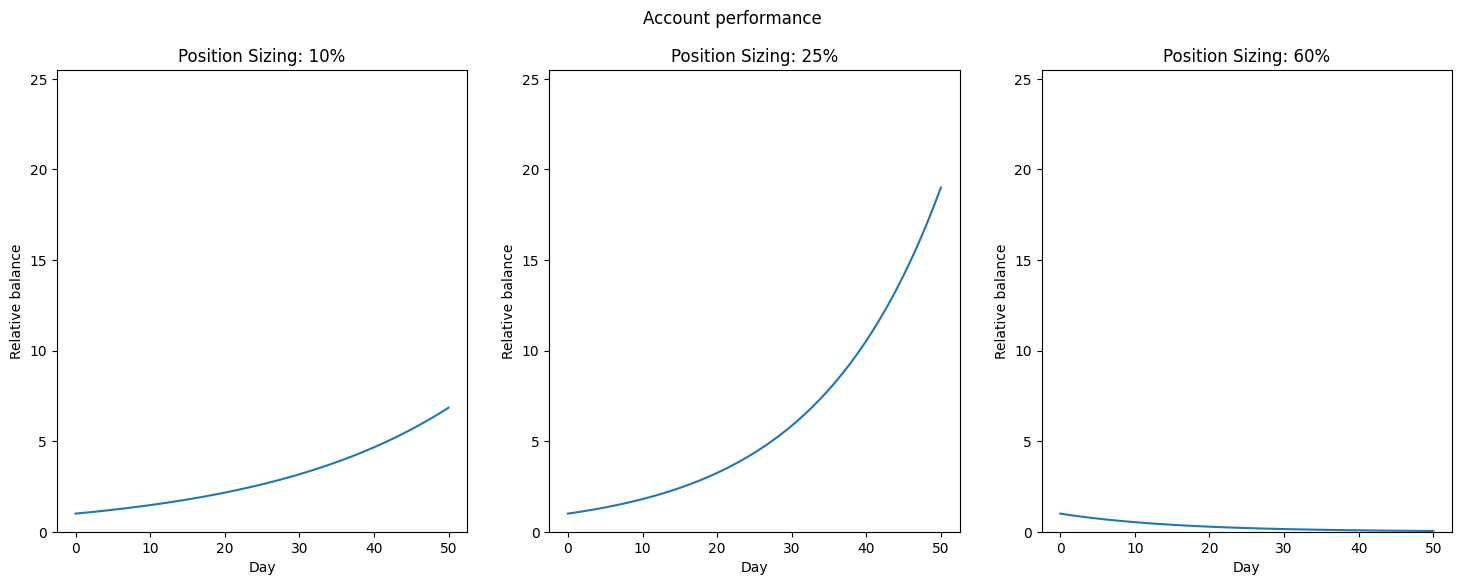

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Account performance')

ax[0].plot(t, return_function(0.1, t))
ax[0].set_title('Position Sizing: 10%')
ax[0].set_xlabel('Day')
ax[0].set_ylabel('Relative balance')
ax[0].set_ylim([0, return_function(_lambda.value[0], 1.1 * x)])

ax[1].plot(t, return_function(_lambda.value[0], t))
ax[1].set_title(f'Position Sizing: {int(_lambda.value[0] * 100)}%')
ax[1].set_xlabel('Day')
ax[1].set_ylabel('Relative balance')
ax[1].set_ylim([0, return_function(_lambda.value[0], 1.1 * x)])

ax[2].plot(t, return_function(0.6, t))
ax[2].set_title('Position Sizing: 60%')
ax[2].set_xlabel('Day')
ax[2].set_ylabel('Relative balance');
ax[2].set_ylim([0, return_function(_lambda.value[0], 1.1 * x)]);